# Analysis of secondary radiation generation

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
#reference values
beta2=35000
beta3=0
beta4=-4.5e6

## Reading and cleaning dataset

In [3]:
#read Gil's data from 2409018 physics run
df_phys_run=pd.read_csv('./datasets/2024_09_18_physicsrun - 20240918_inshot_tempcorrected.csv')

In [4]:
df_phys_run.head()

,Export Page Cols:,O2,O3,O4,Temp Adj ROI,Temp Adj ROI SD,Temp Adj Max,Temp Adj Max SD,Max eV,Max eV SD,...,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,NORMALIZED ENERGY,NORMALIZED FLUX
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,SN,Temp (C),TimeStamp,Mean ROI,Max ROI,Energy,BG Subtracted Value,BG Raw Value,Integrated under Lineout,...,Standard Dev (SD),O3,Standard Dev (SD),O4,Standard Dev (SD),Reps per setting,Centroid SRSI,Centroid SRSI SD,NaN,NaN
3,NaN,176264,77,16:06:00,11.75887664,37.21437143,0.61525,33.76562857,204.2520286,27078.3274,...,0,1.10E+04,0,-5.35E+06,0,5,805.626,0.279636,0.778216,49.938681
4,NaN,176263,77,16:05:58,14.1277562,41.54328571,0.560818,33.55671429,204.0431143,32535.637,...,0,3.00E+03,0,-5.05E+06,0,5,807.423,0.499123,0.684162,126.930606


In [5]:
#drop first two rows
df_phys_run=df_phys_run.drop([0,1])

In [6]:
df_phys_run.head()

,Export Page Cols:,O2,O3,O4,Temp Adj ROI,Temp Adj ROI SD,Temp Adj Max,Temp Adj Max SD,Max eV,Max eV SD,...,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,NORMALIZED ENERGY,NORMALIZED FLUX
2,NaN,SN,Temp (C),TimeStamp,Mean ROI,Max ROI,Energy,BG Subtracted Value,BG Raw Value,Integrated under Lineout,...,Standard Dev (SD),O3,Standard Dev (SD),O4,Standard Dev (SD),Reps per setting,Centroid SRSI,Centroid SRSI SD,NaN,NaN
3,NaN,176264,77,16:06:00,11.75887664,37.21437143,0.61525,33.76562857,204.2520286,27078.3274,...,0,1.10E+04,0,-5.35E+06,0,5,805.626,0.279636,0.778216,49.938681
4,NaN,176263,77,16:05:58,14.1277562,41.54328571,0.560818,33.55671429,204.0431143,32535.637,...,0,3.00E+03,0,-5.05E+06,0,5,807.423,0.499123,0.684162,126.930606
5,NaN,176262,77,16:05:55,15.53008532,45.13946032,0.629348,33.64053968,204.1269397,35765.90711,...,0,-1.30E+04,0,-4.75E+06,0,5,808.648,0.217332,0.341580,249.248672
6,NaN,176261,77,16:05:53,11.46338408,35.79184762,0.651898,33.48815238,203.9745524,26397.22507,...,0,-9.00E+03,0,-4.45E+06,0,5,807.003,0.247062,0.560150,80.661810


In [7]:
#rename columns by the values in the first row
new_list_columns=df_phys_run.iloc[0].to_list()
df_phys_run.columns =new_list_columns
#and drop that first row
df_phys_run=df_phys_run.drop([2])

In [8]:
df_phys_run.head()

,NaN,SN,Temp (C),TimeStamp,Mean ROI,Max ROI,Energy,BG Subtracted Value,BG Raw Value,Integrated under Lineout,...,Standard Dev (SD),O3,Standard Dev (SD),O4,Standard Dev (SD),Reps per setting,Centroid SRSI,Centroid SRSI SD,NaN,NaN
3,NaN,176264,77,16:06:00,11.75887664,37.21437143,0.61525,33.76562857,204.2520286,27078.3274,...,0,1.10E+04,0,-5.35E+06,0,5,805.626,0.279636,0.778216,49.938681
4,NaN,176263,77,16:05:58,14.1277562,41.54328571,0.560818,33.55671429,204.0431143,32535.637,...,0,3.00E+03,0,-5.05E+06,0,5,807.423,0.499123,0.684162,126.930606
5,NaN,176262,77,16:05:55,15.53008532,45.13946032,0.629348,33.64053968,204.1269397,35765.90711,...,0,-1.30E+04,0,-4.75E+06,0,5,808.648,0.217332,0.341580,249.248672
6,NaN,176261,77,16:05:53,11.46338408,35.79184762,0.651898,33.48815238,203.9745524,26397.22507,...,0,-9.00E+03,0,-4.45E+06,0,5,807.003,0.247062,0.560150,80.661810
7,NaN,176260,77,16:05:50,10.70539742,34.6266127,0.560818,33.4933873,203.9797873,24651.43904,...,0,-1.30E+04,0,-4.45E+06,0,5,805.218,0.209279,0.621109,58.445603


In [9]:
df_phys_run.columns.to_list()

[np.float64(nan),
 'SN',
 'Temp (C)',
 'TimeStamp',
 'Mean ROI',
 'Max ROI',
 'Energy',
 'BG Subtracted Value',
 'BG Raw Value',
 'Integrated under Lineout',
 'TL Motor SN',
 'TL Foc',
 'TL Trans',
 'Energy SN',
 'Energy (J)',
 'Centroid SRSI',
 np.float64(nan),
 'Dazz SN',
 'Delay',
 'Ordern 2',
 'Order 3',
 'Order 4',
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 'Temp',
 'Standard Dev (SD)',
 'ROI Mean',
 'Standard Dev (SD)',
 'ROI Max',
 'Standard Dev (SD)',
 'MeV at Max',
 'Standard Dev (SD)',
 'BG Side Mean',
 'Standard Dev (SD)',
 'BG Side Mean Raw',
 'Standard Dev (SD)',
 'Integral Under Lineout',
 'Standard Dev (SD)',
 'Standard Dev (SD)',
 'Standard Dev (SD)',
 'TFoc (mm)',
 'Standard Dev (SD)',
 'TTrans (mm)',
 'Standard Dev (SD)',
 'Energy (mJ, uncal)',
 'Standard Dev (SD)',
 'Del',
 'Standard Dev (SD)',
 'O2',
 'Standard Dev (SD)',
 'O3',
 'Standard Dev (SD)',
 'O4',
 'Standard Dev (SD)',
 'Reps per setting',
 'Centroid SRSI',
 

In [10]:
#create a new dataframe with only the columns we need
df_clean=df_phys_run[['Mean ROI','Max ROI','Integrated under Lineout','Ordern 2','Order 3','Order 4']]
#drop all rows with nan values
df_clean=df_clean.dropna()

In [11]:
df_clean.rename(columns={'Ordern 2':'Order 2'}, inplace=True)

In [12]:
df_clean.head()

,Mean ROI,Max ROI,Integrated under Lineout,Order 2,Order 3,Order 4
3,11.75887664,37.21437143,27078.3274,34800,11000,-5350000
4,14.1277562,41.54328571,32535.637,34800,11000,-5350000
5,15.53008532,45.13946032,35765.90711,34800,11000,-5350000
6,11.46338408,35.79184762,26397.22507,34800,11000,-5350000
7,10.70539742,34.6266127,24651.43904,34800,11000,-5350000


In [13]:
#change types of columns to float
df_clean['Mean ROI']=df_clean['Mean ROI'].astype(float)
df_clean['Max ROI']=df_clean['Max ROI'].astype(float)
df_clean['Integrated under Lineout']=df_clean['Integrated under Lineout'].astype(float)
df_clean['Order 2']=df_clean['Order 2'].astype(int)
df_clean['Order 3']=df_clean['Order 3'].astype(int)
df_clean['Order 4']=df_clean['Order 4'].astype(int)

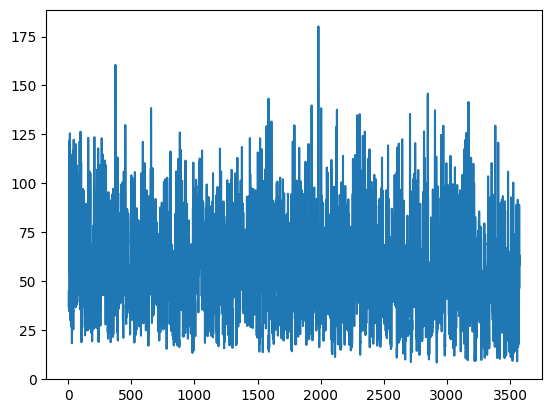

In [14]:
plt.plot(df_clean['Max ROI'], label='Mean ROI')

In [15]:
#average values with same order 2, 3, and 4
df_avg=df_clean.groupby(['Order 2','Order 3','Order 4']).mean().reset_index()

In [16]:
df_avg

,Order 2,Order 3,Order 4,Mean ROI,Max ROI,Integrated under Lineout
0,34400,-21000,-5350000,9.772742,28.646069,22511.977918
1,34400,-21000,-5050000,16.238229,45.772498,37399.016382
2,34400,-21000,-4750000,20.791689,50.691491,47895.680760
3,34400,-21000,-4450000,22.289579,57.037982,51341.403056
4,34400,-21000,-4150000,13.434886,37.393077,30943.043926
...,...,...,...,...,...,...
710,35400,27000,-5350000,28.788929,65.419201,66319.616524
711,35400,27000,-5050000,27.239982,65.731519,62743.845634
712,35400,27000,-4750000,28.026199,66.657342,64556.637674
713,35400,27000,-4450000,20.506812,50.097142,47238.884538


### Looking for the best compresssion values

In [17]:
#define a reference shot close to the FTL best compression shot (o2=35000, o3=0, and o4=-4.5e6)
df_avg[(df_avg['Order 2']==35000) &
(df_avg['Order 3']>-2000) & (df_avg['Order 3']<2000)]

,Order 2,Order 3,Order 4,Mean ROI,Max ROI,Integrated under Lineout
415,35000,-1000,-5350000,11.485621,32.048980,26456.759674
416,35000,-1000,-5050000,15.754907,42.340332,36285.628740
417,35000,-1000,-4750000,33.408550,75.581732,76955.986944
418,35000,-1000,-4450000,29.482824,66.527815,67910.082492
419,35000,-1000,-4150000,24.571860,57.919528,56602.857570


In [18]:
#define the ref values
index=418
mean_roi_ref=df_avg.iloc[index]['Mean ROI']
max_roi_ref=df_avg.iloc[index]['Max ROI']
int_lineout_ref=df_avg.iloc[index]['Integrated under Lineout']
print('Reference Mean ROI:',mean_roi_ref)

Reference Mean ROI: 29.482823919999998


## Plotting

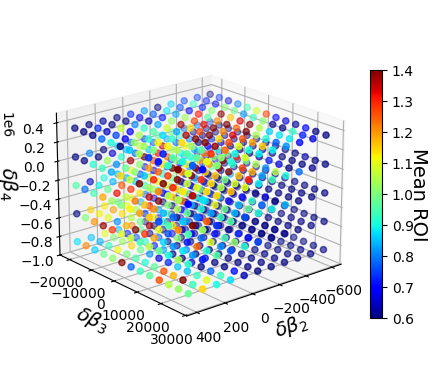

In [19]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plot_3d= ax.scatter(df_avg['Order 2']-beta2, df_avg['Order 3']-beta3, df_avg['Order 4']-beta4,
c=df_avg['Mean ROI']/mean_roi_ref,cmap='jet',vmin=.6,vmax=1.4)

ax.set_xlabel(r'$\delta\beta_2$',fontsize=14)
ax.set_ylabel(r'$\delta\beta_3$',fontsize=14)
ax.set_zlabel(r'$\delta\beta_4$',fontsize=14)
ax.view_init(elev=20., azim=50)
#change z axis to scientific notation
ax.zaxis.get_major_formatter().set_scientific(True)
ax.zaxis.get_major_formatter().set_powerlimits((0, 1))

#set the z limits (to be the same as in the paper)
ax.set_zlim(-1e6,0.5e6)

cbar = plt.colorbar(plot_3d,fraction=0.025, pad=-0.02)
cbar.ax.set_ylabel('Mean ROI', rotation=270,labelpad=10,fontsize=14)
ax.set_box_aspect(None, zoom=0.85)
#plt.show()

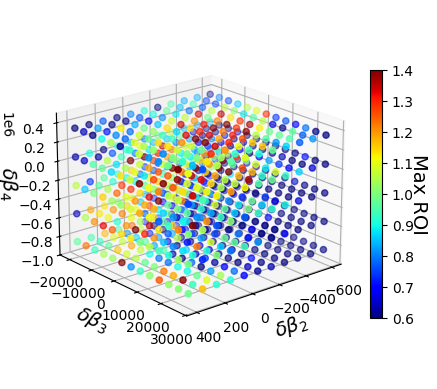

In [20]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plot_3d= ax.scatter(df_avg['Order 2']-beta2, df_avg['Order 3']-beta3, df_avg['Order 4']-beta4,
c=df_avg['Max ROI']/max_roi_ref,cmap='jet',vmin=0.6,vmax=1.4)

ax.set_xlabel(r'$\delta\beta_2$',fontsize=14)
ax.set_ylabel(r'$\delta\beta_3$',fontsize=14)
ax.set_zlabel(r'$\delta\beta_4$',fontsize=14)
ax.view_init(elev=20., azim=50)
#change z axis to scientific notation
ax.zaxis.get_major_formatter().set_scientific(True)
ax.zaxis.get_major_formatter().set_powerlimits((0, 1))

#set the z limits (to be the same as in the paper)
ax.set_zlim(-1e6,0.5e6)

cbar = plt.colorbar(plot_3d,fraction=0.025, pad=-0.02)
cbar.ax.set_ylabel('Max ROI', rotation=270,labelpad=10,fontsize=14)
ax.set_box_aspect(None, zoom=0.85)
#plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


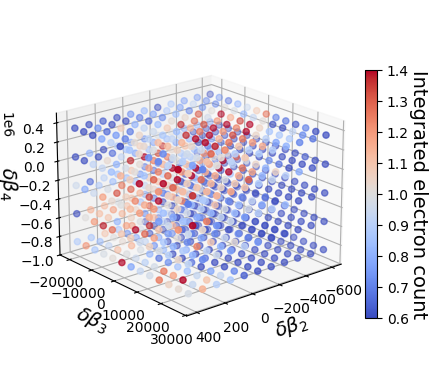

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plot_3d= ax.scatter(df_avg['Order 2']-beta2, df_avg['Order 3']-beta3, df_avg['Order 4']-beta4,
c=df_avg['Integrated under Lineout']/int_lineout_ref,cmap='coolwarm',vmin=0.6,vmax=1.4)

#add a big single point for the reference shot
#ax.scatter(0,0,0,color='black',s=200,marker='s')

ax.set_xlabel(r'$\delta\beta_2$',fontsize=14)
ax.set_ylabel(r'$\delta\beta_3$',fontsize=14)
ax.set_zlabel(r'$\delta\beta_4$',fontsize=14)
ax.view_init(elev=20., azim=50)
#change z axis to scientific notation
ax.zaxis.get_major_formatter().set_scientific(True)
ax.zaxis.get_major_formatter().set_powerlimits((0, 1))

#set the z limits (to be the same as in the paper)
ax.set_zlim(-1e6,0.5e6)

cbar = plt.colorbar(plot_3d,fraction=0.025, pad=-0.03)
cbar.ax.set_ylabel('Integrated electron count', rotation=270,labelpad=14,fontsize=14)
ax.set_box_aspect(None, zoom=0.85)
#plt.show()
# Save figure in EPS format
#plt.savefig('integrated_electron_count_3d.eps', format='eps', dpi=300, bbox_inches='tight')
#plt.show()

### Correlation between quantities

Text(0, 0.5, 'Max ROI (a.u.)')

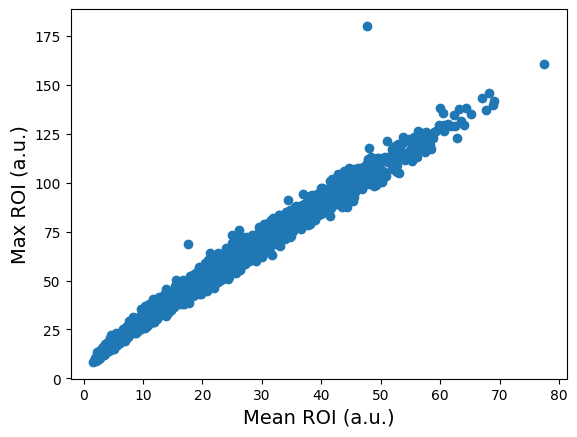

In [22]:
plt.plot(df_clean['Mean ROI'],df_clean['Max ROI'], 'o')
plt.xlabel('Mean ROI (a.u.)',fontsize=14)
plt.ylabel('Max ROI (a.u.)',fontsize=14)

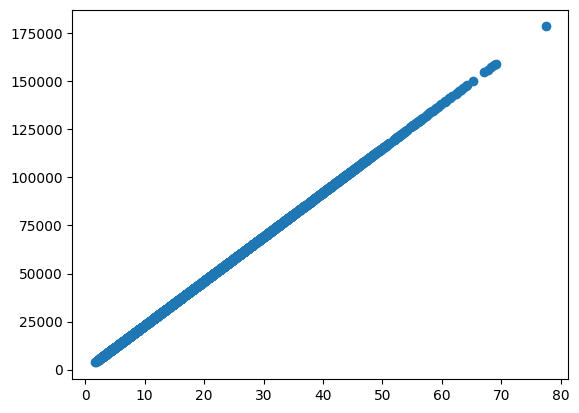

In [23]:
plt.plot(df_clean['Mean ROI'],df_clean['Integrated under Lineout'], 'o')